In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from afinn import Afinn

### 1- Find if there is a correlation between the price of the apps and the Content Rating (Teen, Everyone, Mature)

In [191]:
df = pd.read_csv("../Week 1/exported_data/googleplaystore_clean.csv")
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19.0,10000,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14.0,500000,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7,5000000,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25.0,50000000,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8,100000,Free,0.0,Everyone
...,...,...,...,...,...,...,...,...,...
9655,Sya9a Maroc - FR,FAMILY,4.500000,38,53.0,5000,Free,0.0,Everyone
9656,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6,100,Free,0.0,Everyone
9657,Parkinson Exercices FR,MEDICAL,4.172966,3,9.5,1000,Free,0.0,Everyone
9658,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,Varies with device,1000,Free,0.0,Mature 17+


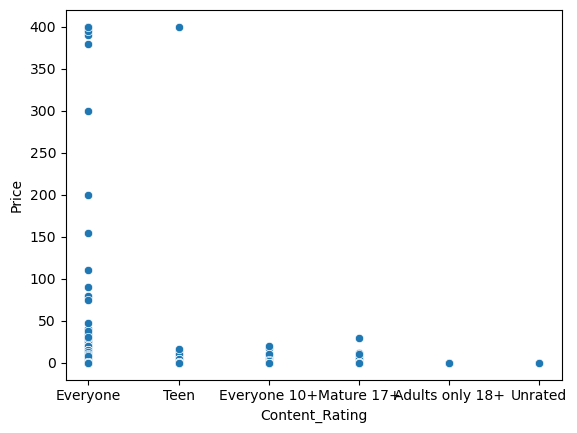

In [192]:
sns.scatterplot(data=df, x="Content_Rating", y="Price")
plt.show()

In [193]:
labels, categories = pd.factorize(df["Content_Rating"])
df["labels"] = labels
df["Price"].corr(df["labels"])

-0.016273897860306672

### 2- Find the sentiment scores of all apps using np files and "afinn" lib

In [194]:
df_2 = pd.read_csv("../Week 0 (Original database)//googleplaystore_user_reviews.csv")
df_2 = df_2.dropna()
df_2 = df_2.reset_index(drop=True)
df_2 = df_2.drop(["Sentiment", "Sentiment_Polarity", "Sentiment_Subjectivity"], axis=1)
df_2.App.value_counts()

Bowmasters                        312
Helix Jump                        273
Angry Birds Classic               273
Calorie Counter - MyFitnessPal    254
Duolingo: Learn Languages Free    240
                                 ... 
Draw a Stickman: EPIC 2             1
HD Camera                           1
Draw In                             1
Draw A Stickman                     1
Best Fiends - Free Puzzle Game      1
Name: App, Length: 865, dtype: int64

In [195]:
scorer = lambda x: afinn.score(x)
df_2["Afinn_Scores"] = df_2.Translated_Review.apply(scorer)

In [196]:
n_df = pd.read_excel("../n.xlsx", header=None)
p_df = pd.read_excel("../p.xlsx", header=None)
n_list = n_df[0].to_list()
p_list = p_df[0].to_list()
def np_scorer(review):
    review_list = review.split(" ")
    np_score = 0
    for word in review_list:
        if word.lower() in n_list:
            np_score -= 1
        elif word.lower() in p_list:
            np_score += 1
        else:
            np_score = np_score
    return np_score
df_2["NP_Scores"] = df_2.Translated_Review.apply(np_scorer)

In [197]:
df_2

,App,Translated_Review,Afinn_Scores,NP_Scores
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,13.0,3
1,10 Best Foods for You,This help eating healthy exercise regular basis,4.0,1
2,10 Best Foods for You,Works great especially going grocery store,3.0,2
3,10 Best Foods for You,Best idea us,3.0,1
4,10 Best Foods for You,Best way,3.0,1
...,...,...,...,...
37422,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,-3.0,-1
37423,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",6.0,0
37424,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",-4.0,-2
37425,Housing-Real Estate & Property,I property business got link SMS happy perform...,5.0,1


### 3- List the top and bottom 5 apps and their categories by sentiment scores for paid apps only

In [198]:
df_2.groupby("App")["Afinn_Scores", "NP_Scores"].sum().sort_values("Afinn_Scores", ascending=False)

C:\Users\Emre Can\AppData\Local\Temp\ipykernel_7164\522992130.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_2.groupby("App")["Afinn_Scores", "NP_Scores"].sum().sort_values("Afinn_Scores", ascending=False)


,Afinn_Scores,NP_Scores
App,,
Helix Jump,1546.0,456
Duolingo: Learn Languages Free,1504.0,505
Calorie Counter - Macros,1058.0,340
Alto's Adventure,1005.0,155
DRAGON BALL LEGENDS,879.0,192
...,...,...
Cricket Visual Voicemail,-58.0,-10
"BestCam Selfie-selfie, beauty camera, photo editor",-65.0,-30
HTC Social Plugin - Facebook,-85.0,-25


In [199]:
apps_with_reviews = df.merge(df_2, how="left", on="App")
best_paid_apps = apps_with_reviews[apps_with_reviews["Type"] == "Paid"].groupby(["App", "Category"])["Afinn_Scores"].sum().sort_values(ascending=False).head()
best_paid_apps

App                           Category
Dr. Panda & Toto's Treehouse  FAMILY      464.0
Essential Anatomy 3           MEDICAL     404.0
Diabetes & Diet Tracker       MEDICAL     364.0
Golfshot Plus: Golf GPS       SPORTS      171.0
Farming Simulator 18          GAME        160.0
Name: Afinn_Scores, dtype: float64

In [200]:
worst_paid_apps = apps_with_reviews[apps_with_reviews["Type"] == "Paid"].groupby(["App", "Category"])["Afinn_Scores"].sum().sort_values(ascending=True).head()
worst_paid_apps

App                                             Category           
Call of Duty:Black Ops Zombies                  GAME                  -1.0
10 WPM Amateur ham radio CW Morse code trainer  COMMUNICATION          0.0
O Céu e o Inferno                               BOOKS_AND_REFERENCE    0.0
O'Route Orienteering                            SPORTS                 0.0
OMEGA Black UI Theme - CM 12+                   PERSONALIZATION        0.0
Name: Afinn_Scores, dtype: float64

### 4- What is the best category according to sentiment values?

In [201]:
best_category = apps_with_reviews.groupby("Category")["Afinn_Scores"].sum().sort_values(ascending=False).head(1)
best_category

Category
GAME    22370.0
Name: Afinn_Scores, dtype: float64